In [1]:
#Dataset:
#   https://archive.ics.uci.edu/ml/datasets/Behavior+of+the+urban+traffic+of+the+city+of+Sao+Paulo+in+Brazil

In [2]:
!pip install pydotplus

     |████████████████████████████████| 286kB 4.8MB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp36-none-any.whl size=24566 sha256=d3fc83a1b705849fbdb521123d9d12cbaffbae6bf03f717e3602e84af54af1df
  Stored in directory: /tmp/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv


In [4]:
data = pd.read_csv("../input/Behavior of the urban traffic of the city of Sao Paulo in Brazil.csv", sep=";", decimal=",")

print(data.dtypes)
data.head()

Hour (Coded)                               int64
Immobilized bus                            int64
Broken Truck                               int64
Vehicle excess                             int64
Accident victim                            int64
Running over                               int64
Fire vehicles                              int64
Occurrence involving freight               int64
Incident involving dangerous freight       int64
Lack of electricity                        int64
Fire                                       int64
Point of flooding                          int64
Manifestations                             int64
Defect in the network of trolleybuses      int64
Tree on the road                           int64
Semaphore off                              int64
Intermittent Semaphore                     int64
Slowness in traffic (%)                  float64
dtype: object


,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [5]:
data.apply(lambda x: x.isnull().value_counts())

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
False,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135,135


In [6]:
y = data["Slowness in traffic (%)"]
X = data.drop("Slowness in traffic (%)", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [7]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=100)
dt_model.fit(X_train,y_train)

y_pred = dt_model.predict(X_test)

print("Decision Tree Score:",dt_model.score(X_test, y_test))

Decision Tree Score: 0.30046203383069514


Text(0, 0.5, 'pred')

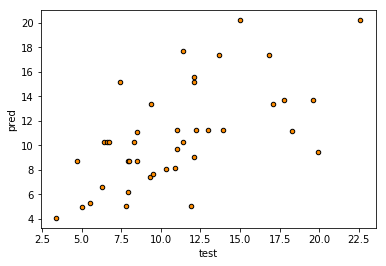

In [8]:
plt.figure()
plt.scatter(y_test, y_pred, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("test")
plt.ylabel("pred")
#plt.title("Decision Tree Regression")
#plt.legend()
#plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


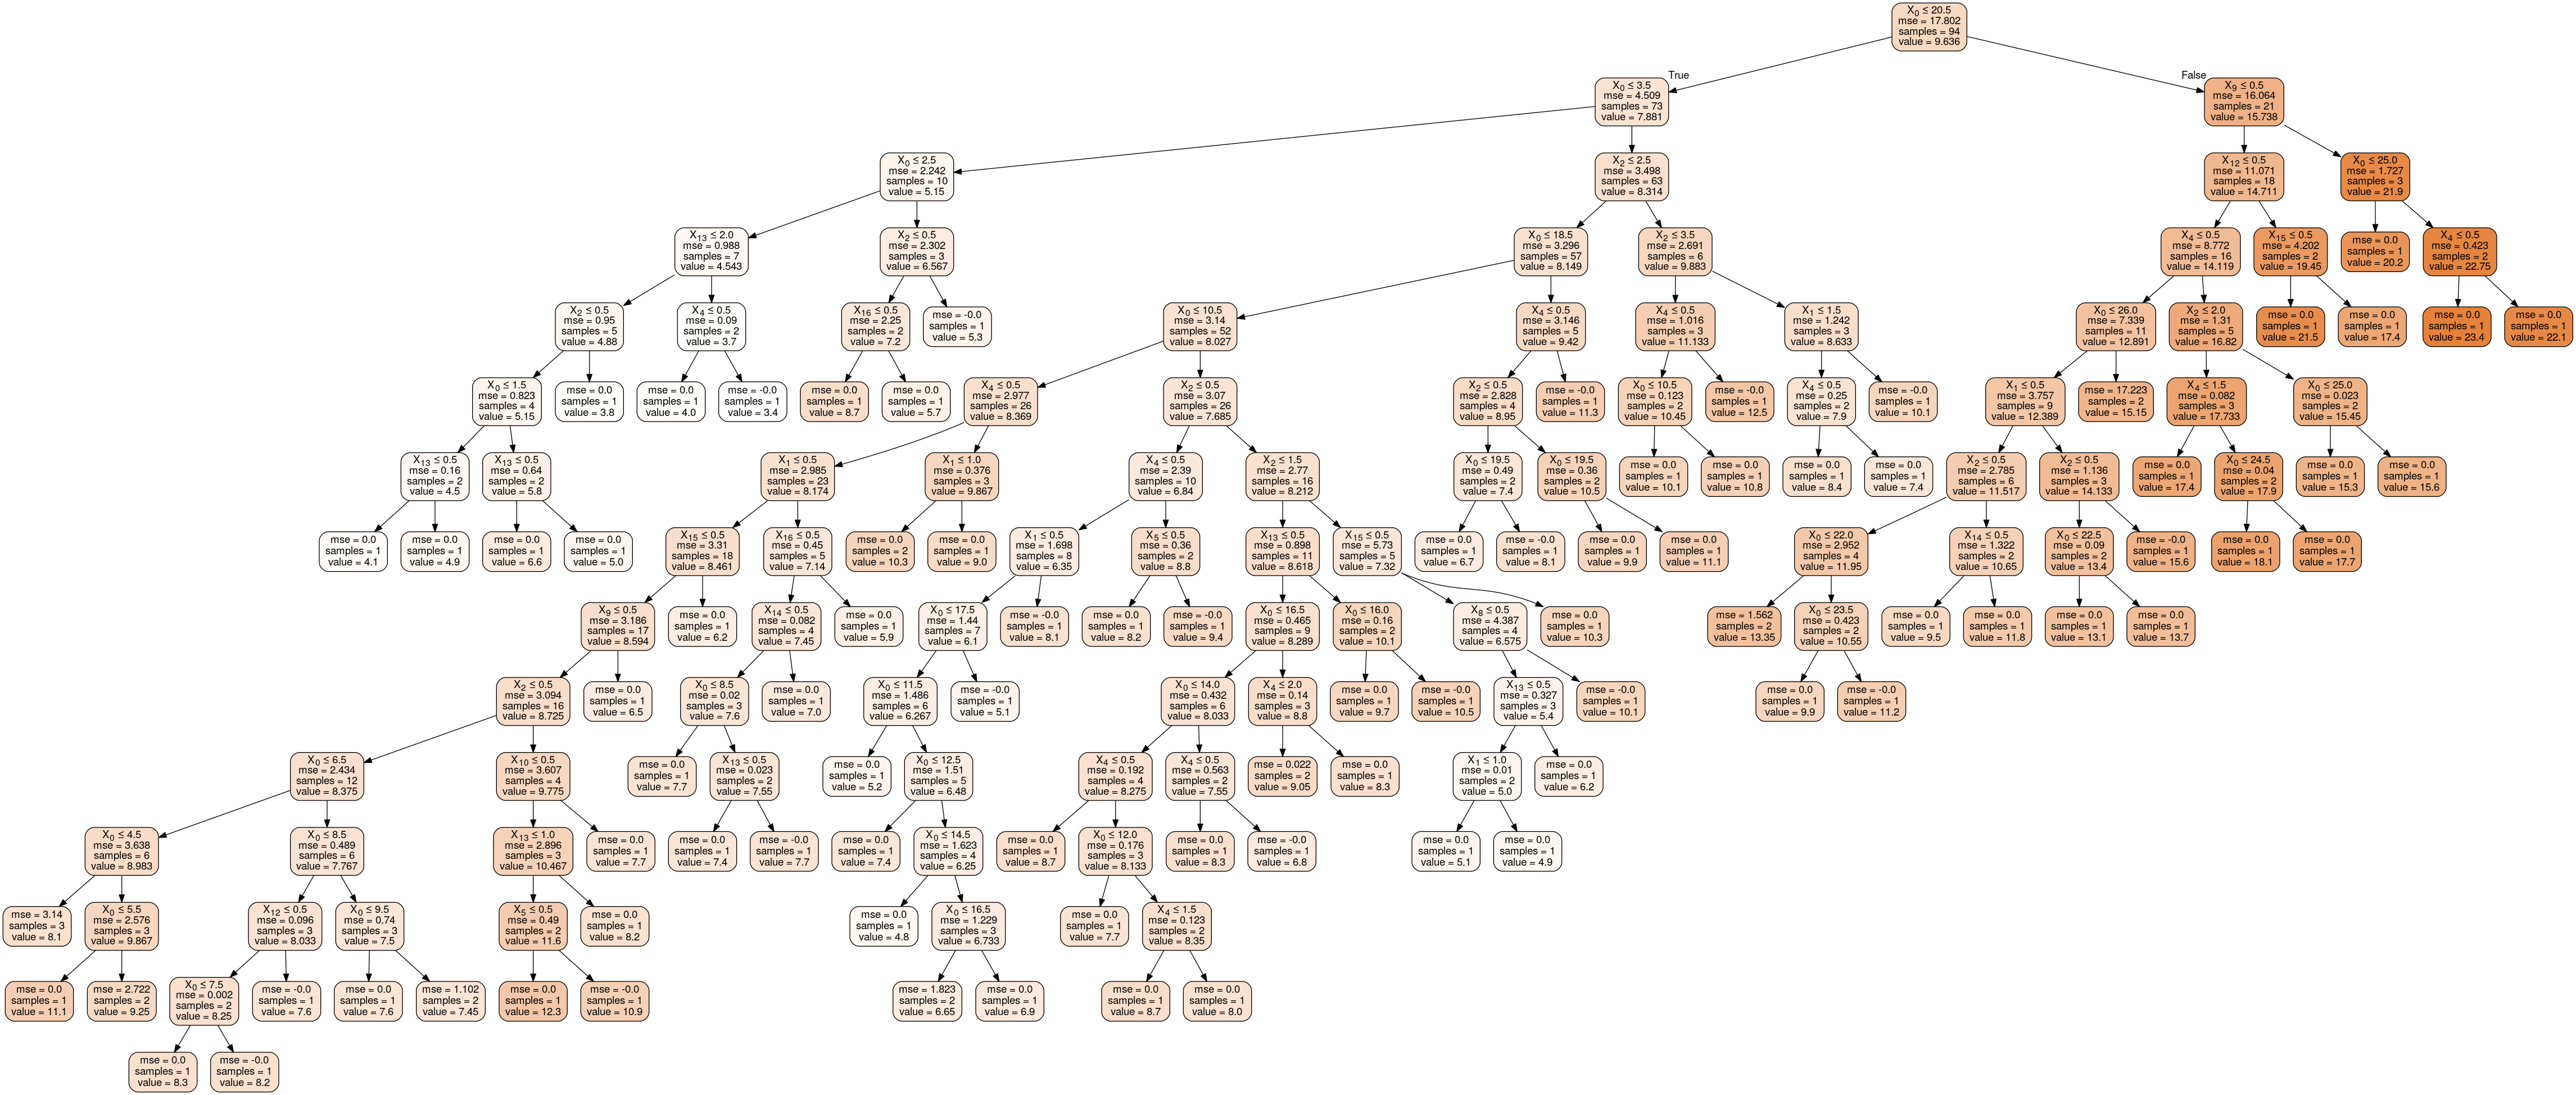

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [10]:
dt_model2 = DecisionTreeRegressor(random_state=100, criterion='friedman_mse', splitter='random', max_depth=3, min_samples_split=4, min_samples_leaf=2)
dt_model2.fit(X_train,y_train)

y_pred2 = dt_model2.predict(X_test)

print("Decision Tree Score:",dt_model2.score(X_test, y_test))

Decision Tree Score: 0.5728087571154803


Text(0, 0.5, 'pred')

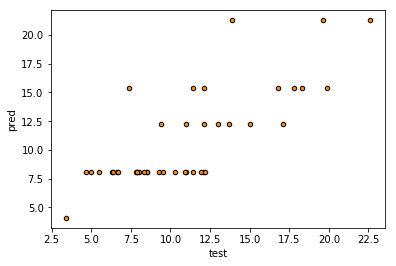

In [11]:
plt.figure()
plt.scatter(y_test, y_pred2, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.xlabel("test")
plt.ylabel("pred")

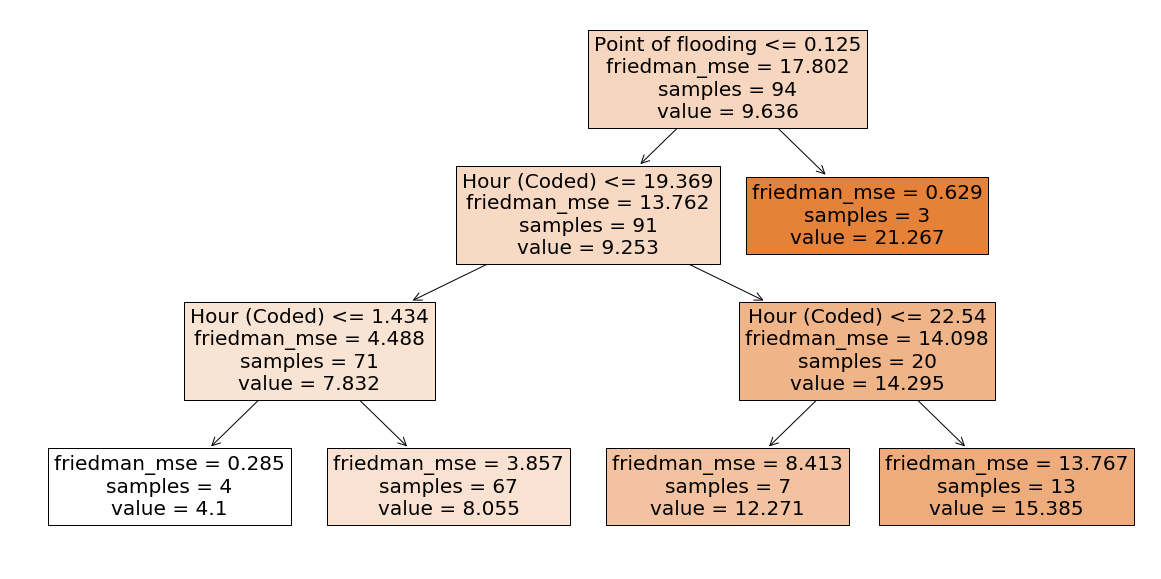

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
tree.plot_tree(dt_model2, filled=True, feature_names =X.columns)
plt.show()